In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from keras.optimizers import Adam

2023-06-29 17:12:36.926581: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-29 17:12:36.978153: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-29 17:12:36.979224: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-29 17:12:37.724212: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
def generate_data(num_samples=1000, im_size=64):
    X = np.random.rand(num_samples, im_size, im_size, 1).astype(np.float32)
    y = np.copy(X)
    X += 0.3 * np.random.randn(num_samples, im_size, im_size, 1).astype(np.float32)
    return X, y

In [3]:
def unet(input_size=(64,64,1)):
    inputs = Input(input_size)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)

    up4 = concatenate([UpSampling2D(size=(2, 2))(conv3), conv2], axis=-1)
    conv4 = Conv2D(64, (3, 3), activation='relu', padding='same')(up4)

    up5 = concatenate([UpSampling2D(size=(2, 2))(conv4), conv1], axis=-1)
    conv5 = Conv2D(32, (3, 3), activation='relu', padding='same')(up5)

    conv6 = Conv2D(1, (1, 1), activation='sigmoid')(conv5)

    model = Model(inputs=inputs, outputs=conv6)

    model.compile(optimizer=Adam(lr=1e-4), loss='mse')

    return model

In [4]:
X, y = generate_data()

model = unet()

model.fit(X, y, batch_size=16, epochs=10, verbose=1, validation_split=0.2)

X_test, y_test = generate_data(num_samples=100)
y_pred = model.predict(X_test)

Epoch 1/10


/srv/conda/envs/notebook/lib/python3.9/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


50/50 [==============================] - 11s 206ms/step - loss: 0.0748 - val_loss: 0.0663
Epoch 2/10
50/50 [==============================] - 10s 203ms/step - loss: 0.0594 - val_loss: 0.0535
Epoch 3/10
50/50 [==============================] - 10s 205ms/step - loss: 0.0500 - val_loss: 0.0473
Epoch 4/10
50/50 [==============================] - 10s 203ms/step - loss: 0.0457 - val_loss: 0.0447
Epoch 5/10
50/50 [==============================] - 10s 204ms/step - loss: 0.0440 - val_loss: 0.0436
Epoch 6/10
50/50 [==============================] - 10s 203ms/step - loss: 0.0434 - val_loss: 0.0433
Epoch 7/10
50/50 [==============================] - 10s 205ms/step - loss: 0.0432 - val_loss: 0.0432
Epoch 8/10
50/50 [==============================] - 10s 204ms/step - loss: 0.0431 - val_loss: 0.0431
Epoch 9/10
50/50 [==============================] - 10s 205ms/step - loss: 0.0430 - val_loss: 0.0431
Epoch 10/10
4/4 [==============================] - 0s 47ms/step


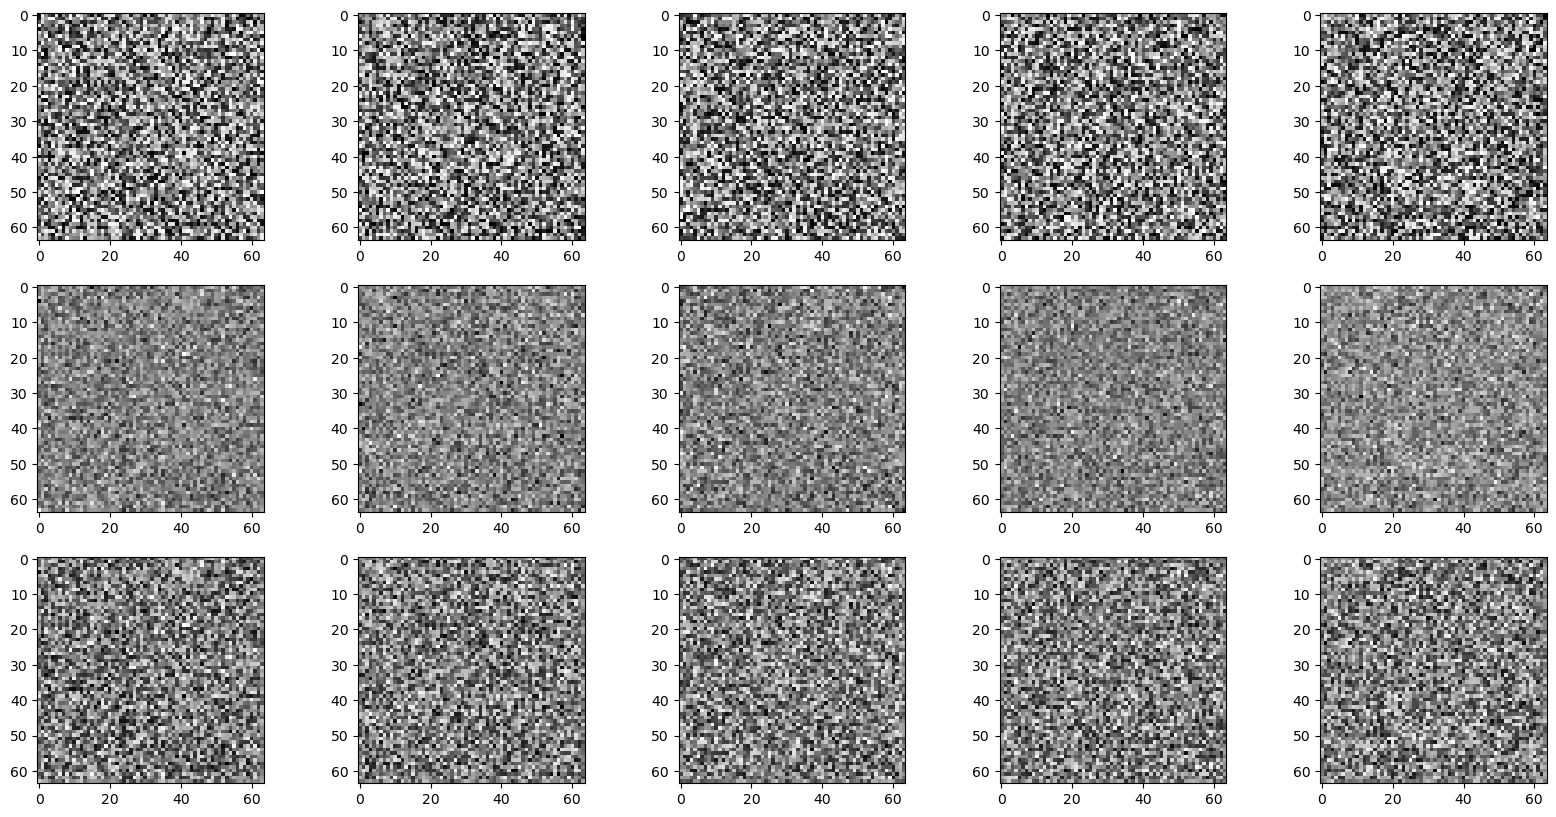

In [5]:
fig, ax = plt.subplots(3, 5, figsize=[20, 10])
for i in range(5):
    ax[0][i].imshow(y_test[i].reshape(64, 64), cmap='gray')
    ax[1][i].imshow(X_test[i].reshape(64, 64), cmap='gray')
    ax[2][i].imshow(y_pred[i].reshape(64, 64), cmap='gray')
plt.show()